In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
file = r'C:\Users\Joel\Dropbox\Institute of Data\IOD Class Work\capstone\data\Option 2 - Police Force Strength\use_of_force.csv'
data = pd.read_csv(file)
data.head()

IncidentDate IncidentTime Incident Location: Street/Highway  \
0   2020-04-01     00:12:00                               Yes   
1   2020-04-01     01:30:00                               Yes   
2   2020-04-01     03:30:00                                No   
3   2020-04-01     04:25:00                                No   
4   2020-04-01     04:12:00                                No   

  Incident Location: Public Transport Incident Location: Retail Premises  \
0                                  No                                 No   
1                                  No                                 No   
2                                  No                                 No   
3                                  No                                 No   
4                                  No                                 No   

  Incident Location: Open ground (e.g. park, car park, field)  \
0                                                 No            
1                                                 No            
2                                                 No            
3                                                 No            
4                                                 No            

  Incident Location: Licensed Premises  \
0                                   No   
1                                   No   
2                                   No   
3                                   No   
4                                   No   

  Incident Location: Sports or Event Stadia  \
0                                        No   
1                                        No   
2                                        No   
3                                        No   
4                                        No   

  Incident Location: Hospital/A&E (non-mental-health setting)  \
0                                                 No            
1                                                 No            
2                                                 No            
3                                                 No            
4                                                 No            

  Incident Location: Mental Health Setting  ... SubjectInjured  \
0                                       No  ...             No   
1                                       No  ...             No   
2                                       No  ...             No   
3                                       No  ...             No   
4                                       No  ...             No   

  SubjectNatureOfInjury SubjectMedOffered SubjectMedProvided  \
0                   NaN               NaN                NaN   
1                   NaN               NaN                NaN   
2                   NaN               NaN                NaN   
3                   NaN               NaN                NaN   
4                   NaN               NaN                NaN   

  Outcome: Made off/escaped Outcome: Arrested Outcome: Hospitalised  \
0                        No               Yes                    No   
1                        No               Yes                    No   
2                        No               Yes                    No   
3                        No                No                    No   
4                        No               Yes                    No   

  Outcome: Detained - Mental Health Act Outcome: Fatality Outcome: Other  
0                                    No                No             No  
1                                    No                No            Yes  
2                                    No                No             No  
3                                    No                No            Yes  
4                                    No                No             No  

[5 rows x 271 columns]

In [27]:
data.shape

(147895, 275)

In [3]:
for i in data.columns: 
    print(i)

IncidentDate
IncidentTime
Incident Location: Street/Highway
Incident Location: Public Transport
Incident Location: Retail Premises
Incident Location: Open ground (e.g. park, car park, field)
Incident Location: Licensed Premises
Incident Location: Sports or Event Stadia
Incident Location: Hospital/A&E (non-mental-health setting)
Incident Location: Mental Health Setting
Incident Location: Police vehicle with prisoner handling cage
Incident Location: Police vehicle without prisoner handling cage
Incident Location: Dwelling
Incident Location: Police station (excluding custody block)
Incident Location: Custody Block
Incident Location: Ambulance
Incident Location: Other
Borough
PrimaryConduct
AssaultedBySubject
ThreatenedWithWeapon
AssaultedWithWeapon
Impact Factor: Possesion of a weapon
Impact Factor: Alcohol
Impact Factor: Drugs
Impact Factor: Mental Health
Impact Factor: Prior Knowledge
Impact Factor: Size/Gender/Build
Impact Factor: Acute Behavioural Disorder
Impact Factor: Crowd
Impact 

In [4]:
data['PrimaryConduct'].value_counts()

Compliant                           64058
Active resistance                   26525
Verbal resistance/gestures          20243
Aggressive resistance               18655
Passive resistance                  13017
Serious or aggravated resistance     5397
Name: PrimaryConduct, dtype: int64

Must class resistance levels / aggression levels.
- 0 = Compliant
- 1 = Verbal resistance / gestures
- 2 = Passive resistance 
- 3 = Active resistance
- 4 = Aggressive resistance
- 5 = Serious or Aggravated resistance 

In [3]:
classes = {
    'Compliant': 0,
    'Verbal resistance/gestures': 1,
    'Passive resistance': 2,
    'Active resistance': 3,
    'Aggressive resistance': 4,
    'Serious or aggravated resistance': 5
}

data['PrimaryConduct'] = data['PrimaryConduct'].map(classes)

In [4]:
data['PrimaryConduct'].head()

0    1
1    2
2    4
3    2
4    4
Name: PrimaryConduct, dtype: int64

# Was force required?

In [5]:
data['Tactic 1'].value_counts()

Compliant handcuffing                                                             66923
Tactical communications                                                           35797
Non-compliant handcuffing                                                         16415
Unarmed skills (including pressure points, strikes, restraints and take-downs)    11516
Ground restraint                                                                   4593
CED (Taser) red-dotted                                                             2712
Limb/body restraints                                                               2511
Other/improvised                                                                   1973
CED (Taser) drawn                                                                  1382
Firearm aimed                                                                      1131
CED (Taser) aimed                                                                   584
Baton drawn                     

In [6]:
data['Tactic 2'].fillna('finished', inplace = True)
data['Tactic 3'].fillna('finished', inplace = True)

In [7]:
data['Tactic 2'].head()

0                   finished
1    Tactical communications
2                   finished
3                   finished
4    Tactical communications
Name: Tactic 2, dtype: object

In [9]:
data['Tactic 1'].head()

0                                Compliant handcuffing
1    Unarmed skills (including pressure points, str...
2                                     Ground restraint
3    Unarmed skills (including pressure points, str...
4                                     Ground restraint
Name: Tactic 1, dtype: object

In [10]:
data['T1 Force'] = [0 if x == 'Compliant handcuffing' else 0 if x == 'Tactical communications' else 1 for x in data['Tactic 1']]

In [12]:
data['T1 Force'].head()

0    0
1    1
2    1
3    1
4    1
Name: T1 Force, dtype: int64

In [13]:
# Tactic 2
data['Tactic 2'].head()

0                   finished
1    Tactical communications
2                   finished
3                   finished
4    Tactical communications
Name: Tactic 2, dtype: object

In [14]:
data['T2 Force'] = [0 if x == 'Compliant handcuffing' else 0 if x == 'Tactical communications' else 0 if x == 'finished' else 1 for x in data['Tactic 2']]

In [15]:
data['T2 Force'].head()

0    0
1    0
2    0
3    0
4    0
Name: T2 Force, dtype: int64

In [16]:
data['T3 Force'] = [0 if x == 'Compliant handcuffing' else 0 if x == 'Tactical communications' else 0 if x == 'finished' else 1 for x in data['Tactic 3']]

In [19]:
data['T3 Force'].value_counts()

0    131906
1     15989
Name: T3 Force, dtype: int64

In [24]:
tactics = pd.DataFrame([data['T1 Force'], data['T2 Force'], data['T3 Force']]).T
tactics['Was Force Needed?'] = tactics.sum(axis = 1)
tactics['Was Force Needed?'] = [1 if x >= 1 else 0 for x in tactics['Was Force Needed?']]
tactics.head()

T1 Force  T2 Force  T3 Force  Was Force Needed?
0         0         0         0                  0
1         1         0         0                  1
2         1         0         0                  1
3         1         0         0                  1
4         1         0         1                  1

In [25]:
data['Was Force Needed?'] = tactics['Was Force Needed?']
data['Was Force Needed?'].head()

0    0
1    1
2    1
3    1
4    1
Name: Was Force Needed?, dtype: int64

# Visualizing Whether Force was Needed

In [33]:
print(yes)

67950


In [38]:
yes = np.sum(data['Was Force Needed?'])
no = 147895 - yes
dictionary = {
    'Yes': yes,
    'No': no
}

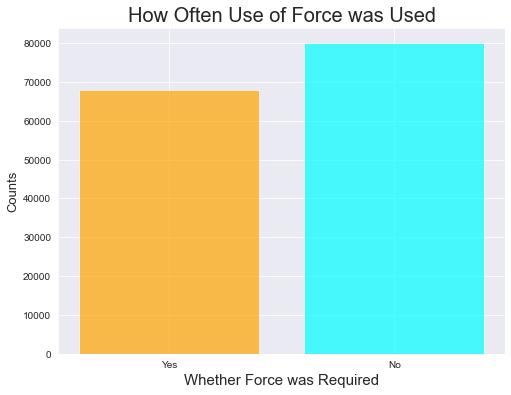

In [75]:
plt.figure(figsize = (8,6))
plt.bar(range(len(dictionary)), list(dictionary.values()), align='center', alpha = 0.7, color = ['orange','cyan'])
plt.xticks(range(len(dictionary)), list(dictionary.keys()))
plt.xlabel('Whether Force was Required', fontsize = 15)
plt.ylabel('Counts', fontsize = 13)
plt.title('How Often Use of Force was Used', fontsize = 20)
plt.show()

# Main Factors Analysis

In [65]:
factors = data.where(data['Was Force Needed?'] == 1)
factors.head()

IncidentDate IncidentTime Incident Location: Street/Highway  \
0          NaN          NaN                               NaN   
1   2020-04-01     01:30:00                               Yes   
2   2020-04-01     03:30:00                                No   
3   2020-04-01     04:25:00                                No   
4   2020-04-01     04:12:00                                No   

  Incident Location: Public Transport Incident Location: Retail Premises  \
0                                 NaN                                NaN   
1                                  No                                 No   
2                                  No                                 No   
3                                  No                                 No   
4                                  No                                 No   

  Incident Location: Open ground (e.g. park, car park, field)  \
0                                                NaN            
1                                                 No            
2                                                 No            
3                                                 No            
4                                                 No            

  Incident Location: Licensed Premises  \
0                                  NaN   
1                                   No   
2                                   No   
3                                   No   
4                                   No   

  Incident Location: Sports or Event Stadia  \
0                                       NaN   
1                                        No   
2                                        No   
3                                        No   
4                                        No   

  Incident Location: Hospital/A&E (non-mental-health setting)  \
0                                                NaN            
1                                                 No            
2                                                 No            
3                                                 No            
4                                                 No            

  Incident Location: Mental Health Setting  ... Outcome: Made off/escaped  \
0                                      NaN  ...                       NaN   
1                                       No  ...                        No   
2                                       No  ...                        No   
3                                       No  ...                        No   
4                                       No  ...                        No   

  Outcome: Arrested Outcome: Hospitalised  \
0               NaN                   NaN   
1               Yes                    No   
2               Yes                    No   
3                No                    No   
4               Yes                    No   

  Outcome: Detained - Mental Health Act Outcome: Fatality Outcome: Other  \
0                                   NaN               NaN            NaN   
1                                    No                No            Yes   
2                                    No                No             No   
3                                    No                No            Yes   
4                                    No                No             No   

  T1 Force T2 Force  T3 Force Was Force Needed?  
0      NaN      NaN       NaN               NaN  
1      1.0      0.0       0.0               1.0  
2      1.0      0.0       0.0               1.0  
3      1.0      0.0       0.0               1.0  
4      1.0      0.0       1.0               1.0  

[5 rows x 275 columns]

In [67]:
factors = factors[['Impact Factor: Possesion of a weapon', 
                'Impact Factor: Alcohol',
                'Impact Factor: Drugs',
                'Impact Factor: Mental Health',
                'Impact Factor: Prior Knowledge',
                'Impact Factor: Size/Gender/Build',
                'Impact Factor: Acute Behavioural Disorder',
                'Impact Factor: Crowd',
                'Impact Factor: Other']]
factors.head()

Impact Factor: Possesion of a weapon Impact Factor: Alcohol  \
0                                  NaN                    NaN   
1                                   No                    Yes   
2                                   No                    Yes   
3                                   No                    Yes   
4                                   No                    Yes   

  Impact Factor: Drugs Impact Factor: Mental Health  \
0                  NaN                          NaN   
1                   No                           No   
2                   No                          Yes   
3                  Yes                           No   
4                  Yes                           No   

  Impact Factor: Prior Knowledge Impact Factor: Size/Gender/Build  \
0                            NaN                              NaN   
1                             No                               No   
2                             No                               No   
3                             No                               No   
4                             No                               No   

  Impact Factor: Acute Behavioural Disorder Impact Factor: Crowd  \
0                                       NaN                  NaN   
1                                        No                   No   
2                                        No                   No   
3                                        No                   No   
4                                        No                   No   

  Impact Factor: Other  
0                  NaN  
1                   No  
2                   No  
3                   No  
4                   No

In [68]:
for i in factors.columns:
    print(factors[i].value_counts())

No     49441
Yes    18509
Name: Impact Factor: Possesion of a weapon, dtype: int64
No     48715
Yes    19235
Name: Impact Factor: Alcohol, dtype: int64
No     45515
Yes    22435
Name: Impact Factor: Drugs, dtype: int64
No     51575
Yes    16375
Name: Impact Factor: Mental Health, dtype: int64
No     46491
Yes    21459
Name: Impact Factor: Prior Knowledge, dtype: int64
No     40557
Yes    27393
Name: Impact Factor: Size/Gender/Build, dtype: int64
No     65316
Yes     2634
Name: Impact Factor: Acute Behavioural Disorder, dtype: int64
No     56861
Yes    11089
Name: Impact Factor: Crowd, dtype: int64
No     62603
Yes     5347
Name: Impact Factor: Other, dtype: int64


In [69]:
# Create data frame out of impact value counts
impact_values = {'Possesion of a weapon': 18509, 
                'Alcohol': 19235,
                'Drugs': 22435,
                'Mental Health': 16375,
                'Prior Knowledge': 21459,
                'Size/Gender/Build': 27393,
                'Acute Behavioural Disorder': 2634,
                'Crowd': 11089,
                'Other': 5347}
impact_list = list(impact_values.keys())
impact_counts = list(impact_values.values())
d = {'Impact Factors': impact_list, 'Counts': impact_counts}

impact_tallies_df = pd.DataFrame(data = d)
impact_tallies_df['Percentage'] = impact_tallies_df['Counts'] / 147895
impact_tallies_df.sort_values(by='Counts', ascending = False, inplace = True)
impact_tallies_df.head()


Impact Factors  Counts  Percentage
5      Size/Gender/Build   27393    0.185219
2                  Drugs   22435    0.151695
4        Prior Knowledge   21459    0.145096
1                Alcohol   19235    0.130058
0  Possesion of a weapon   18509    0.125150

In [73]:
factors.shape

(147895, 9)

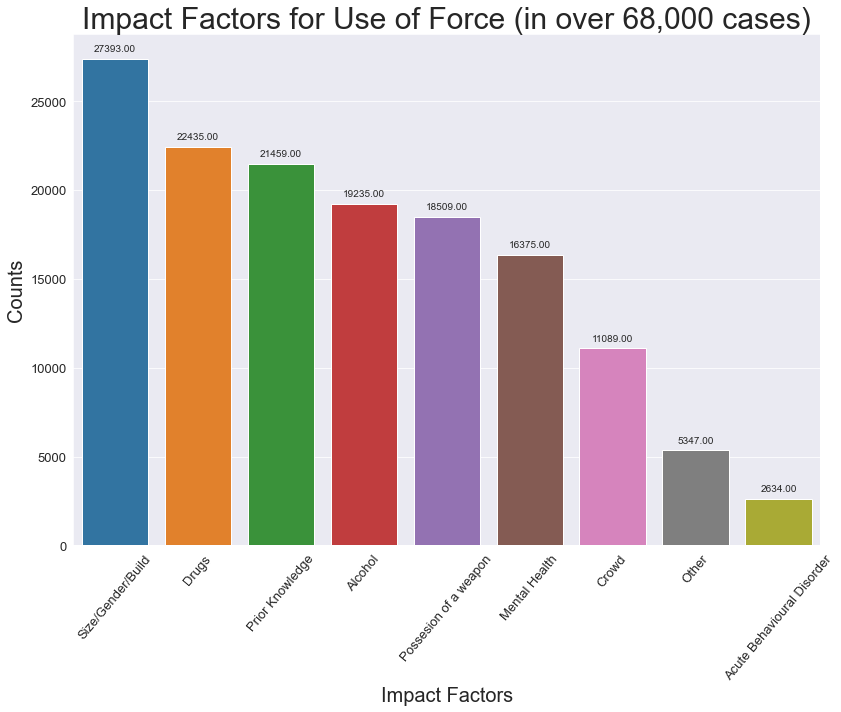

In [76]:
# Visualize data
plt.figure(figsize=(12, 10))
ax = sns.set_style('darkgrid')
ax = sns.barplot(x=impact_tallies_df['Impact Factors'], y = impact_tallies_df['Counts'])
ax.set_xlabel('Impact Factors', fontsize = 20)
ax.set_ylabel('Counts', fontsize = 20)
ax.axes.set_title('Impact Factors for Use of Force (in over 68,000 cases)', fontsize = 30)
plt.xticks(rotation = 50)
plt.tick_params(labelsize = 13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha =           'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.tight_layout()

In [63]:
impacts = data[['Impact Factor: Possesion of a weapon', 
                'Impact Factor: Alcohol',
                'Impact Factor: Drugs',
                'Impact Factor: Mental Health',
                'Impact Factor: Prior Knowledge',
                'Impact Factor: Size/Gender/Build',
                'Impact Factor: Acute Behavioural Disorder',
                'Impact Factor: Crowd',
                'Impact Factor: Other']]
for i in impacts.columns:
    impacts[i] = impacts[i].map({'Yes': 1, 'No': 0})
    
impacts['Was Force Used'] = data['Was Force Needed?']
impacts.head()

Impact Factor: Possesion of a weapon  Impact Factor: Alcohol  \
0                                     0                       0   
1                                     0                       1   
2                                     0                       1   
3                                     0                       1   
4                                     0                       1   

   Impact Factor: Drugs  Impact Factor: Mental Health  \
0                     0                             0   
1                     0                             0   
2                     0                             1   
3                     1                             0   
4                     1                             0   

   Impact Factor: Prior Knowledge  Impact Factor: Size/Gender/Build  \
0                               1                                 1   
1                               0                                 0   
2                               0                                 0   
3                               0                                 0   
4                               0                                 0   

   Impact Factor: Acute Behavioural Disorder  Impact Factor: Crowd  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   Impact Factor: Other  Was Force Used  
0                     0               0  
1                     0               1  
2                     0               1  
3                     0               1  
4                     0               1

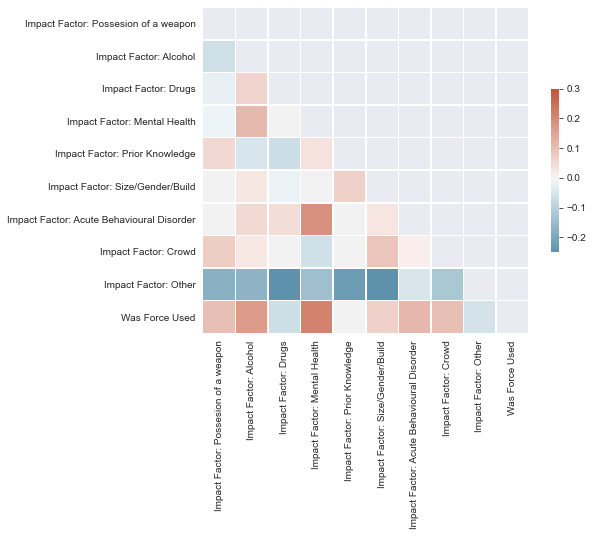

In [64]:
corr = impacts.corr()
datacorr = corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})